<a href="https://colab.research.google.com/github/ihebakermi10/iheb_portfolio/blob/main/kWh_electricity_day_et_Gas_day.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [76]:
df=pd.read_excel("/content/elec.xlsx")
df.head()


,date,Cumulative_solar_power,kWh electricity/day,Gas/day
0,2011-10-26,0.1,15.1,9.0
1,2011-10-27,10.2,7.4,9.2
2,2011-10-28,20.2,5.8,8.0
3,2011-10-29,29.6,4.9,6.6
4,2011-10-30,34.2,11.7,5.3


In [78]:

df['hour'] = df['date'].dt.hour
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['year'] = df['date'].dt.year

# Séparer les données en fonction des caractéristiques et de la variable cible
X = df[['hour', 'month', 'day', 'year']]
y1 = df[['Gas/day']]

y2 = df['kWh electricity/day']

# Concaténer les deux colonnes de y en une seule
y = pd.concat([y1, y2], axis=1)


X.head()

,hour,month,day,year
0,0,10,26,2011
1,0,10,27,2011
2,0,10,28,2011
3,0,10,29,2011
4,0,10,30,2011


In [65]:
y1.head()

,Gas/day
0,9.0
1,9.2
2,8.0
3,6.6
4,5.3


In [66]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)

# Normaliser les données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entraîner le modèle de régression linéaire
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Faire des prévisions sur l'ensemble de test
y_pred = model.predict(X_test_scaled)

# Calculer l'erreur quadratique moyenne (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')


RMSE: 6.104353447436161


In [68]:
from sklearn.preprocessing import StandardScaler

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.2, random_state=42)

# Créer un objet StandardScaler pour X et y1
scaler_X = StandardScaler()
scaler_y = StandardScaler()

# Ajuster et transformer les données d'entraînement
X_train_scaled = scaler_X.fit_transform(X_train)
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1))

# Transformer les données de test
X_test_scaled = scaler_X.transform(X_test)
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1,1))

# Créer un modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train_scaled, y_train_scaled)

# Faire des prédictions sur les données de test
y_pred_scaled = model.predict(X_test_scaled)

# Convertir les prédictions et les valeurs réelles en échelle originale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test = scaler_y.inverse_transform(y_test_scaled)

# Évaluer les performances du modèle
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")


RMSE: 6.104353447436161


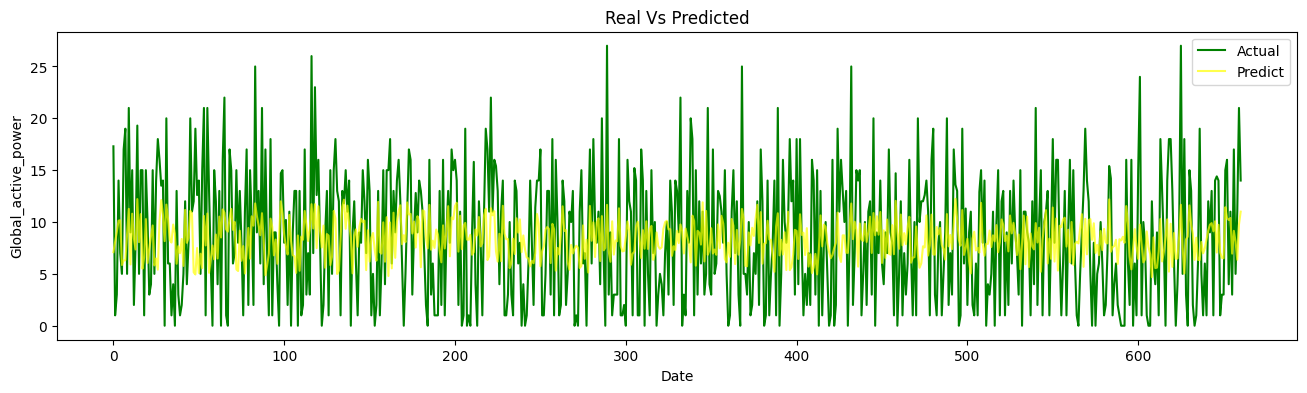

In [69]:

plt.figure(figsize=(16,4))
plt.plot(y_test, color='green',label='Actual')
plt.plot(y_pred, alpha=0.7, color='yellow',label='Predict')
plt.title('Real Vs Predicted')
plt.xlabel('Date')
plt.ylabel('Global_active_power')
plt.legend()
plt.show()

RMSE: 9.609816579533051


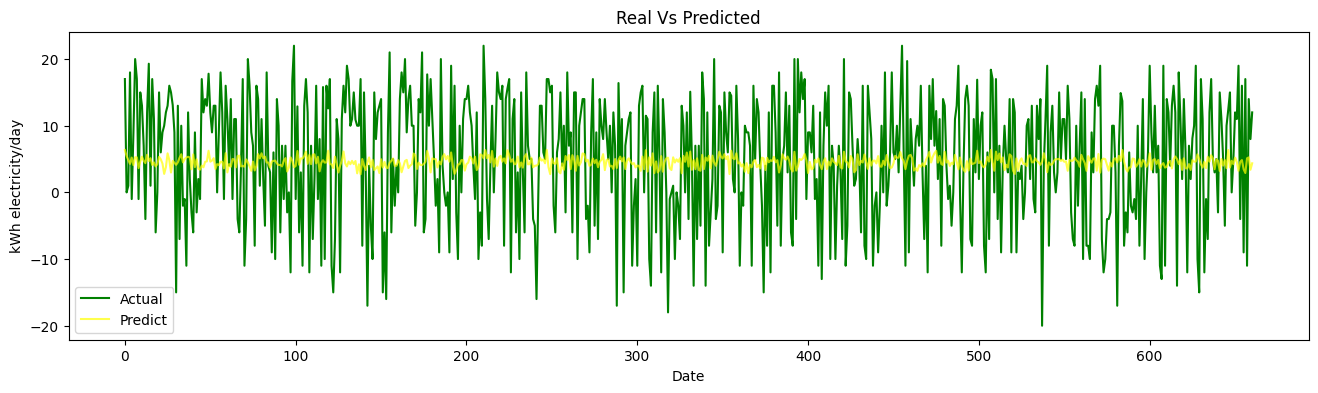

In [88]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Séparer les données en fonction des caractéristiques et de la variable cible

# Créer un objet MinMaxScaler pour X et y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Ajuster et transformer les données
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y2.values.reshape(-1, 1))

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Créer un modèle de régression linéaire
model = LinearRegression()

# Entraîner le modèle sur les données d'entraînement
model.fit(X_train, y_train)

# Faire des prédictions sur les données de test
y_pred_scaled = model.predict(X_test)

# Convertir les prédictions et les valeurs réelles en échelle originale
y_pred = scaler_y.inverse_transform(y_pred_scaled)
y_test = scaler_y.inverse_transform(y_test)

# Évaluer les performances du modèle
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"RMSE: {rmse}")

# Afficher un graphique des valeurs réelles par rapport aux valeurs prédites
plt.figure(figsize=(16,4))
plt.plot(y_test, color='green',label='Actual')
plt.plot(y_pred, alpha=0.7, color='yellow',label='Predict')
plt.title('Real Vs Predicted')
plt.xlabel('Date')
plt.ylabel('kWh electricity/day')
plt.legend()
plt.show()



In [73]:
data=pd.read_excel("/content/elec.xlsx")
data.head()

,date,Cumulative_solar_power,kWh electricity/day,Gas/day
0,2011-10-26,0.1,15.1,9.0
1,2011-10-27,10.2,7.4,9.2
2,2011-10-28,20.2,5.8,8.0
3,2011-10-29,29.6,4.9,6.6
4,2011-10-30,34.2,11.7,5.3


In [83]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Séparer les données en fonction des caractéristiques et de la variable cible


# Créer un objet MinMaxScaler pour X et y
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Ajuster et transformer les données
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y)

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# Créer le modèle de réseau neuronal avec des ajustements
modelk = tf.keras.Sequential([
    tf.keras.layers.Dense(720, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2)
])

# Compiler le modèle avec un taux d'apprentissage ajusté
modelk.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

# Entraîner le modèle avec un nombre d'époques plus élevé
modelk.fit(X_train, y_train, epochs=200, batch_size=32, validation_split=0.2)

# Évaluer le modèle sur l'ensemble de test
loss = model.evaluate(X_test, y_test)
print(f'Loss sur l\'ensemble de test : {loss}')


Epoch 1/200
67/67 [==============================] - 4s 23ms/step - loss: 0.1042 - val_loss: 0.0178
Epoch 2/200
67/67 [==============================] - 1s 19ms/step - loss: 0.0237 - val_loss: 0.0150
Epoch 3/200
67/67 [==============================] - 1s 19ms/step - loss: 0.0212 - val_loss: 0.0156
Epoch 4/200
67/67 [==============================] - 1s 13ms/step - loss: 0.0171 - val_loss: 0.0132
Epoch 5/200
67/67 [==============================] - 1s 13ms/step - loss: 0.0157 - val_loss: 0.0167
Epoch 6/200
67/67 [==============================] - 1s 13ms/step - loss: 0.0159 - val_loss: 0.0128
Epoch 7/200
67/67 [==============================] - 1s 13ms/step - loss: 0.0145 - val_loss: 0.0107
Epoch 8/200
67/67 [==============================] - 1s 13ms/step - loss: 0.0145 - val_loss: 0.0122
Epoch 9/200
67/67 [==============================] - 1s 19ms/step - loss: 0.0154 - val_loss: 0.0125
Epoch 10/200
67/67 [==============================] - 1s 18ms/step - loss: 0.0152 - val_loss: 0.0123

21/21 [==============================] - 0s 4ms/step


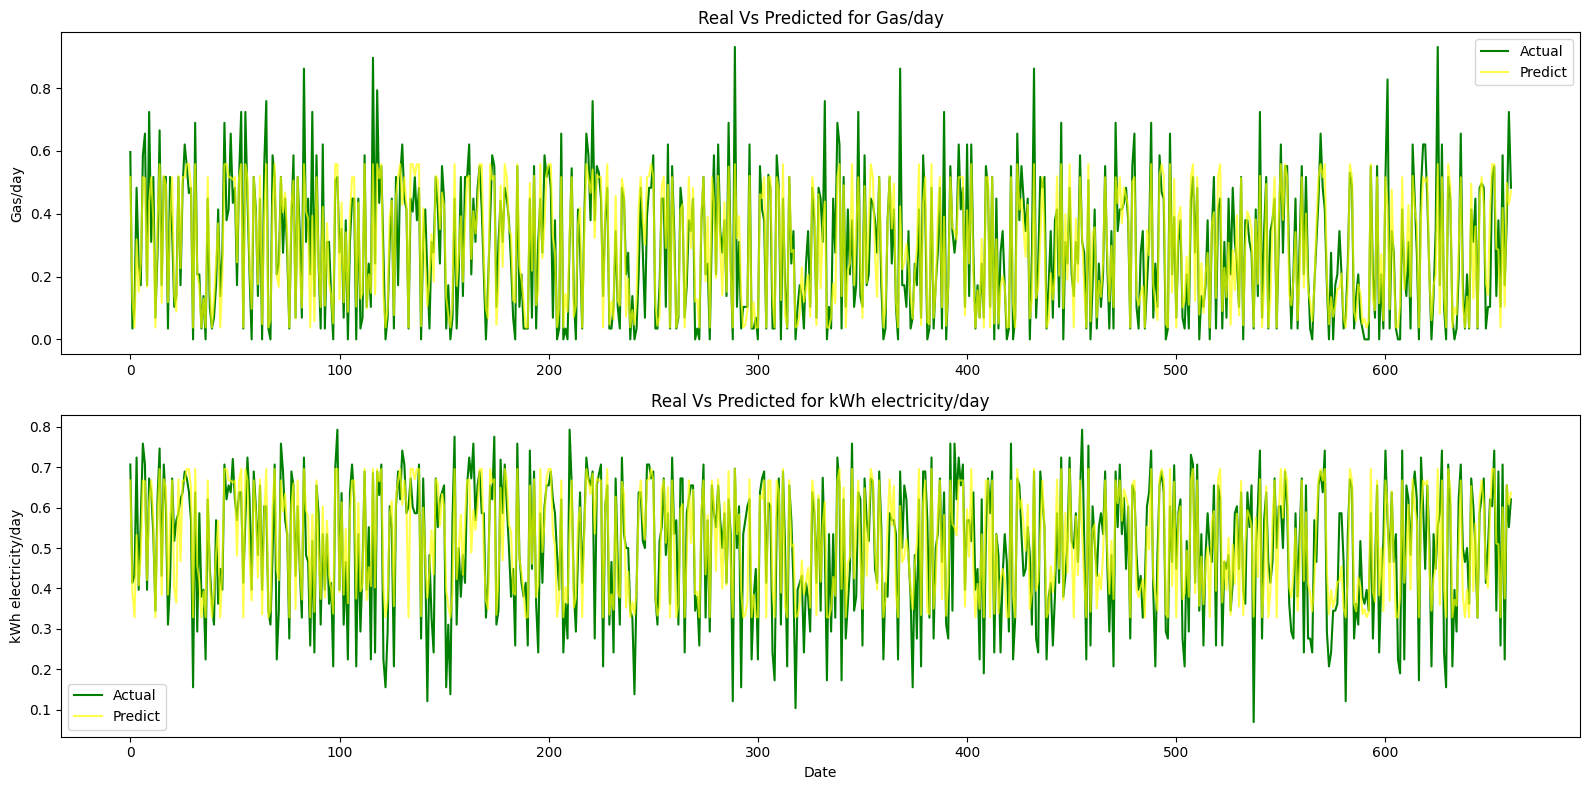

In [84]:
# Faire des prédictions sur l'ensemble de test
y_pred = modelk.predict(X_test)

# Convertir y_test et y_pred en DataFrame pour faciliter l'accès aux colonnes
y_test_df = pd.DataFrame(y_test, columns=['Gas/day', 'kWh electricity/day'])
y_pred_df = pd.DataFrame(y_pred, columns=['Gas/day', 'kWh electricity/day'])

# Afficher les valeurs réelles et prédites
import matplotlib.pyplot as plt

plt.figure(figsize=(16,8))

# Afficher les valeurs réelles et prédites de 'Gas/day'
plt.subplot(2, 1, 1)
plt.plot(y_test_df['Gas/day'], color='green', label='Actual')
plt.plot(y_pred_df['Gas/day'], alpha=0.7, color='yellow', label='Predict')
plt.title('Real Vs Predicted for Gas/day')
plt.ylabel('Gas/day')
plt.legend()

# Afficher les valeurs réelles et prédites de 'kWh electricity/day'
plt.subplot(2, 1, 2)
plt.plot(y_test_df['kWh electricity/day'], color='green', label='Actual')
plt.plot(y_pred_df['kWh electricity/day'], alpha=0.7, color='yellow', label='Predict')
plt.title('Real Vs Predicted for kWh electricity/day')
plt.xlabel('Date')
plt.ylabel('kWh electricity/day')
plt.legend()

plt.tight_layout()
plt.show()
